In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
weather = pd.read_csv('C:/project22/raw_fire_weather_7yr.csv')

In [3]:
# 실효습도 
# (1-r)*(weather.loc['일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] + r3*weather.loc[i-3,'일평균상대습도'] + r4*weather.loc[i-4,'일평균상대습도'])
# weather.loc[i, '실효습도']= (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] + r3*weather.loc[i-3,'일평균상대습도'] + r4*weather.loc[i-4,'일평균상대습도']) 
# weather.loc[i, '실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] + r3*weather.loc[i-3,'일평균상대습도'] + r4*weather.loc[i-4,'일평균상대습도']) 

r = 0.7
r2 = 0.7*0.7
r3 = 0.7*0.7*0.7
r4 = 0.7*0.7*0.7*0.7

for i in range(len(weather)):
    if i == 0 :
        weather.loc[i, '실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'])
    elif i == 1:
        weather.loc[i, '실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'])
    elif i == 2:
        weather.loc[i, '실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] )
    elif i == 3:
        weather.loc[i, '실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] + r3*weather.loc[i-3,'일평균상대습도'])
    else:
        weather.loc[i, '실효습도'] = (1-r)*(weather.loc[i, '일평균상대습도'] + r*weather.loc[i-1,'일평균상대습도'] + r2*weather.loc[i-2,'일평균상대습도'] + r3*weather.loc[i-3,'일평균상대습도'] + r4*weather.loc[i-4,'일평균상대습도'])         

In [4]:
weather_1 = weather

In [5]:
weather['실효습도']

0       13.620000
1       21.294000
2       27.953700
3       32.707590
4       39.199113
          ...    
5497    61.035544
5498    54.307305
5499    46.709639
5500    42.977073
5501    41.372461
Name: 실효습도, Length: 5502, dtype: float64

In [6]:
sanbul = weather[weather['산불발생여부'] == 1]

In [7]:
sanbul.describe()

,산불발생여부,관측일,평균기온,일최고기온,일최고기온시각,일최저기온,일최저기온시각,일평균현지기압,일최고현지기압,일최고현지기압시각,...,최다운량,최다운량시각,일합계일조시간,일합계일사량,일평균지면온도,진화종료시간_년,진화종료시간_월,진화종료시간_일,피해면적_합계,실효습도
count,1265.0,1.265000e+03,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,...,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000
mean,1.0,2.017055e+07,10.509975,17.434505,1394.951153,3.798957,802.729797,997.746692,1000.471560,1083.896218,...,6.980708,910.909240,8.824314,17.425954,13.219809,2017.006324,4.735968,15.394466,6.374190,43.368299
std,0.0,2.009846e+04,8.597552,9.196822,158.001676,8.192960,483.414243,8.618840,8.633773,744.364079,...,2.790961,515.237048,2.530541,6.140050,10.621245,2.007886,2.920602,8.976506,79.242905,9.574232
min,1.0,2.014010e+07,-11.354000,-7.531000,25.308000,-15.662000,41.643000,974.850000,976.977000,1.000000,...,0.000000,0.000000,0.000000,1.064000,-7.223000,2014.000000,1.000000,1.000000,0.010000,22.837647
25%,1.0,2.015060e+07,3.264000,9.829000,1368.000000,-2.936000,513.357000,991.392000,994.315000,592.643000,...,5.250000,500.000000,7.543000,12.035000,4.100000,2015.000000,3.000000,7.000000,0.030000,35.851929
50%,1.0,2.017051e+07,10.821000,18.215000,1424.462000,3.238000,620.357000,997.614000,1000.186000,890.571000,...,7.833000,866.667000,9.257000,17.928000,12.992000,2017.000000,4.000000,15.000000,0.100000,42.362955
75%,1.0,2.019031e+07,17.515000,24.869000,1473.286000,9.757000,902.071000,1004.557000,1007.229000,1889.846000,...,9.214000,1307.143000,10.729000,22.692000,21.457000,2019.000000,6.000000,23.000000,0.300000,50.504849
max,1.0,2.020122e+07,31.279000,37.864000,1899.071000,26.007000,2357.308000,1020.050000,1022.371000,2355.286000,...,10.000000,2100.000000,13.008000,29.237000,40.436000,2020.000000,12.000000,31.000000,1944.000000,70.837375


<AxesSubplot:>

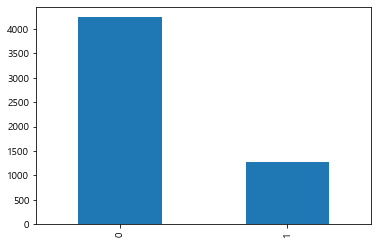

In [8]:
weather['산불발생여부'].value_counts().plot(kind = "bar")

In [9]:
# weather['산불발생여부'].value_counts().plot(kind = "pie")

In [10]:
# weather['피해면적_합계'].value_counts().plot(kind = "bar")

In [11]:
# import warnings warnings.filterwarnings("ignore") 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn import datasets, model_selection, linear_model, ensemble,neighbors 
from sklearn.metrics import mean_squared_error,accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import RandomForestClassifier 

from xgboost import plot_importance
from xgboost import XGBClassifier

In [12]:
weather.columns

Index(['산불발생여부', '발생장소_시도', '관측일', '평균기온', '일최고기온', '일최고기온시각', '일최저기온',
       '일최저기온시각', '일평균현지기압', '일최고현지기압', '일최고현지기압시각', '일최저현지기압', '일최저현지기압시각',
       '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압', '일최저해면기압시각', '일평균상대습도',
       '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량', '일평균중하층운량', '최다운량', '최다운량시각',
       '일합계일조시간', '일합계일사량', '일평균지면온도', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시군구', '발생장소_읍면',
       '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', '피해면적_합계', '실효습도'],
      dtype='object')

In [13]:
# list_a = list(weather['일평균현지기압'].describe())
# # list_a[0]
# list_a

In [14]:
weather[['실효습도']].describe()

,실효습도
count,5502.000000
mean,53.637677
std,11.966594
min,13.620000
25%,44.134429
50%,55.137154
75%,63.295538
max,79.574661


In [15]:
# 실효습도 범주화
weather['실효습도'] = pd.cut(weather.실효습도, bins = [13, 44, 55, 63, 79], labels = [0, 1, 2, 3])
# 실효습도와 산불 발생여부 %로 확인
weather.groupby(['실효습도',])['산불발생여부'].mean()*100

실효습도
0    52.170714
1    28.075253
2    11.111111
3     1.401542
Name: 산불발생여부, dtype: float64

<AxesSubplot:xlabel='실효습도'>

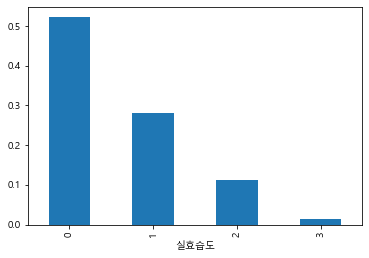

In [16]:
# 실효습도와 산불발생여부 시각화
weather.groupby(['실효습도',])['산불발생여부'].mean().plot(kind = 'bar')

In [17]:
weather[['일최대순간풍속풍향']].describe()

,일최대순간풍속풍향
count,5502.000000
mean,215.517342
std,54.659458
min,55.000000
25%,180.714000
50%,227.143000
75%,259.231000
max,320.714000


In [18]:
# 일최대순간풍속풍향와 산불발생여부

# 일최대순간풍속풍향 범주화
weather['일최대순간풍속풍향'] = pd.cut(weather.일최대순간풍속풍향, bins = [55, 180, 227, 259, 320], labels = [0, 1, 2, 3])
# 일최대순간풍속풍향와 산불 발생여부 %로 확인
weather.groupby(['일최대순간풍속풍향',])['산불발생여부'].mean()*100

일최대순간풍속풍향
0    13.973799
1    22.123894
2    25.885756
3    29.920692
Name: 산불발생여부, dtype: float64

In [19]:
# df_ws = (weather[['일평균풍속']].describe())
# df_ws.values[3][0]
# 3 min
# 4 25
# 5 50
# 6 75
# 7 max


In [20]:
# for i in range(len(weather.columns)):
#     df_describe = weather[[i]].describe()
#     for j in range(3,8):
#         bin_var = df_ws.values[i][0]
        

In [21]:
weather['일평균현지기압'].describe()

count    5502.000000
mean      996.097859
std         9.108520
min       962.715000
25%       989.732500
50%       995.950000
75%      1002.705250
max      1020.050000
Name: 일평균현지기압, dtype: float64

In [22]:
# 일평균현지기압와 산불발생여부

# 일평균현지기압 범주화
weather['일평균현지기압'] = pd.cut(weather.일평균현지기압, bins = [962, 989, 995, 1002, 1020], labels = [0, 1, 2, 3])
# 일평균현지기압와 산불 발생여부 %로 확인
weather.groupby(['일평균현지기압',])['산불발생여부'].mean()*100

일평균현지기압
0    15.961692
1    22.792937
2    23.576691
3    28.363154
Name: 산불발생여부, dtype: float64

<AxesSubplot:xlabel='일평균현지기압'>

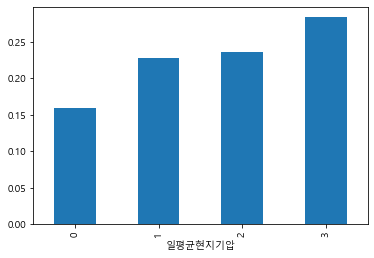

In [23]:
# 일평균현지기압와 산불발생여부 시각화
weather.groupby(['일평균현지기압',])['산불발생여부'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='일평균현지기압'>

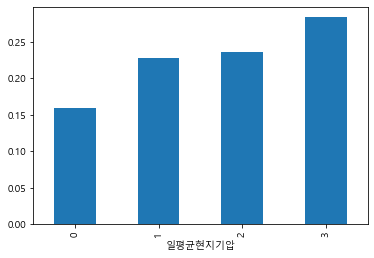

In [24]:
# 일평균현지기압와 산불발생여부 시각화
weather.groupby(['일평균현지기압',])['산불발생여부'].mean().plot(kind = 'bar')
# 습도가 낮을 수록 산불이 많이남

In [25]:
weather['일평균풍속'].describe()

count    5502.000000
mean        1.931043
std         0.754891
min         0.614000
25%         1.385000
50%         1.743000
75%         2.321000
max         6.231000
Name: 일평균풍속, dtype: float64

In [26]:
# 일평균풍속와 산불발생여부

# 일평균풍속 범주화
weather['일평균풍속'] = pd.cut(weather.일평균풍속, bins = [0.6, 1.3, 1.7, 2.3, 6.2], labels = [0, 1, 2, 3])
# 일평균풍속와 산불 발생여부 %로 확인
weather.groupby(['일평균풍속',])['산불발생여부'].mean()*100

일평균풍속
0    10.328638
1    19.253438
2    27.759197
3    31.541726
Name: 산불발생여부, dtype: float64

<AxesSubplot:xlabel='일평균풍속'>

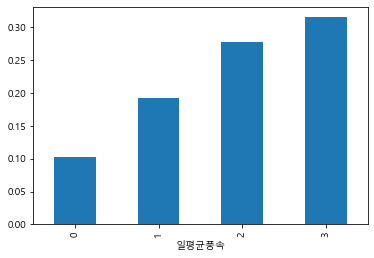

In [27]:
# 일평균풍속와 산불발생여부 시각화
weather.groupby(['일평균풍속',])['산불발생여부'].mean().plot(kind = 'bar')
# 습도가 낮을 수록 산불이 많이남

In [28]:
# weather.groupby([])
# 습도와 산불 발생여부 상관관계
weather['일최소상대습도'].describe()

count    5502.000000
mean       39.529534
std        17.583168
min         6.786000
25%        24.643000
50%        38.143000
75%        51.571000
max        96.500000
Name: 일최소상대습도, dtype: float64

In [29]:
# 일최소 상대습도와 산불발생여부

# 일최소상대습도 범주화
weather['일최소상대습도'] = pd.cut(weather.일최소상대습도, bins = [6, 24, 38, 51, 96], labels = [0, 1, 2, 3])
# 일최소상대습도와 산불 발생여부 %로 확인
weather.groupby(['일최소상대습도',])['산불발생여부'].mean()*100

일최소상대습도
0    53.430995
1    26.141079
2    12.556054
3     1.830986
Name: 산불발생여부, dtype: float64

<AxesSubplot:xlabel='일최소상대습도'>

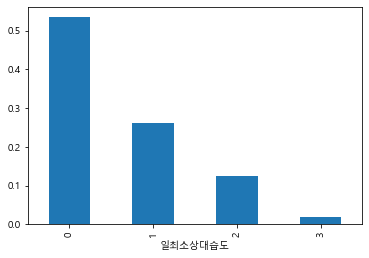

In [30]:
# 일최소상대습도와 산불발생여부 시각화
weather.groupby(['일최소상대습도',])['산불발생여부'].mean().plot(kind = 'bar')
# 습도가 낮을 수록 산불이 많이남

In [31]:
# 일평균지면온도
weather['일평균지면온도'].describe()

count    5502.000000
mean       14.569210
std        10.961562
min        -9.038000
25%         4.201750
50%        14.866500
75%        24.100000
max        40.436000
Name: 일평균지면온도, dtype: float64

In [32]:
# 일평균지면온도 범주화
weather['일평균지면온도'] = pd.cut(weather.일평균지면온도, bins = [-9, 4, 14, 24, 40], labels = [0, 1, 2, 3])
# 일평균지면온도와 산불 발생여부 %로 확인
weather.groupby(['일평균지면온도',])['산불발생여부'].mean()*100

일평균지면온도
0    23.276501
1    29.952456
2    22.266935
3    17.167382
Name: 산불발생여부, dtype: float64

<AxesSubplot:xlabel='일평균지면온도'>

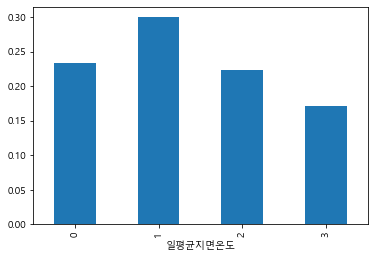

In [33]:
# 일평균지면온도와 산불발생여부 시각화
weather.groupby(['일평균지면온도',])['산불발생여부'].mean().plot(kind = 'bar')
# 평균 지면온도와 큰 관련은 없음 다만 4~14사이 일때 가장 많이 발생하고 이후 산불발생 떨어짐

In [34]:
weather['일최고기온'].describe()

count    5502.000000
mean       18.044650
std         9.594198
min        -9.493000
25%         9.643000
50%        19.555500
75%        26.070500
max        37.864000
Name: 일최고기온, dtype: float64

In [35]:
# 일최고기온 범주화
weather['일최고기온'] = pd.cut(weather.일최고기온, bins = [-9, 9, 19, 26, 37], labels = [0, 1, 2, 3])
# 일최고기온와 산불 발생여부 %로 확인
weather.groupby(['일최고기온',])['산불발생여부'].mean()*100

일최고기온
0    21.968504
1    28.602305
2    22.522523
3    18.799142
Name: 산불발생여부, dtype: float64

<AxesSubplot:xlabel='일최고기온'>

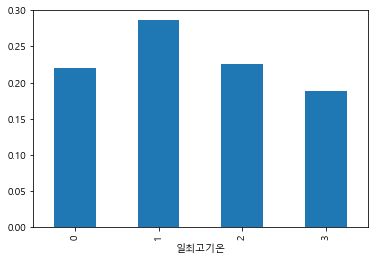

In [36]:
# 일최고기온와 산불발생여부 시각화
weather.groupby(['일최고기온',])['산불발생여부'].mean().plot(kind = 'bar')
# 최고온도와 큰 관련은 없음 다만 9~14사이 일때 가장 많이 발생하고 이후 산불발생 떨어짐

In [37]:
# x_data_test = [x_data] 
# # combining train and test dataset for dataset in x_data_test: dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) x_data['Title'].value_counts()

In [38]:
# weather['Sex']=LabelEncoder().fit(['female','male']).transform(weather['Sex'])

In [39]:
weather.columns

Index(['산불발생여부', '발생장소_시도', '관측일', '평균기온', '일최고기온', '일최고기온시각', '일최저기온',
       '일최저기온시각', '일평균현지기압', '일최고현지기압', '일최고현지기압시각', '일최저현지기압', '일최저현지기압시각',
       '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압', '일최저해면기압시각', '일평균상대습도',
       '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량', '일평균중하층운량', '최다운량', '최다운량시각',
       '일합계일조시간', '일합계일사량', '일평균지면온도', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시군구', '발생장소_읍면',
       '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', '피해면적_합계', '실효습도'],
      dtype='object')

In [40]:
weather_model = weather_1.drop([ '발생장소_시도', '관측일', '일최고기온시각', '평균기온', '일최저기온', '일평균중하층운량', '일합계일조시간' , '일평균지면온도',
       '일최저기온시각', '일최고현지기압시각', '일최저현지기압시각',
        '일최고해면기압시각', '일최저해면기압시각',
       '일최소상대습도시각', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각','일최대풍속시각',
       '일최대순간풍속시각','최다운량시각',
       '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시군구', '발생장소_읍면',
       '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', '피해면적_합계'], axis=1)

In [41]:
# weather_model.loc[weather_model['일최고기온'] != weather['일최고기온']] = weather['일최고기온'].mean()
weather_model = weather_model.fillna(method = 'ffill')

In [64]:
weather_1


,산불발생여부,발생장소_시도,관측일,평균기온,일최고기온,일최고기온시각,일최저기온,일최저기온시각,일평균현지기압,일최고현지기압,...,진화종료시간_시간,발생장소_관서,발생장소_시군구,발생장소_읍면,발생장소_동리,발생원인_구분,발생원인_세부원인,발생원인_기타,피해면적_합계,실효습도
0,0,강원,20140101,3.631,0,1403.385,-0.331,713.154,0,988.123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0,경북,20140101,4.907,0,1382.286,-0.264,764.500,2,1000.529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0,경북,20140102,2.379,0,1398.071,-2.579,1727.643,3,1006.907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0,강원,20140102,0.823,0,1390.615,-3.962,1452.231,1,994.338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0,강원,20140103,1.546,0,1374.154,-3.538,938.846,1,992.823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5497,0,강원,20201229,0.757,0,1291.286,-2.779,954.000,1,997.529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5498,0,경북,20201230,-6.479,0,3.929,-9.779,2339.143,3,1006.721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5499,0,강원,20201230,-8.864,0,1.000,-12.579,2317.571,1,996.386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5500,0,강원,20201231,-8.971,0,1477.143,-14.443,525.929,2,998.136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [42]:
# weather_model.isnull().sum()

In [43]:
# y에 산불 발생 유무, x에 변수
y_data = weather_model[['산불발생여부']] 
x_data = weather_model.copy() 
del x_data['산불발생여부']

In [44]:
# x_data_test = [x_data] 
# combining train and test dataset for dataset in x_data_test: dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) x_data['Title'].value_counts()


In [62]:
weather_model['일최고기온']

0       0
1       0
2       0
3       0
4       0
       ..
5497    0
5498    0
5499    0
5500    0
5501    0
Name: 일최고기온, Length: 5502, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [46]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler 

# ct = ColumnTransformer([ ('age', StandardScaler(), ['Age']), 
#                         ('fare', RobustScaler(), ['Fare']) ], remainder='passthrough')

In [47]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=0)
normalizer = StandardScaler()
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.fit_transform(x_test)

In [48]:
params = {'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 5, 'learning_rate': 0.01}

#하이퍼 파라미터 
svc_params = {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [49]:
# pip install vecstack

In [50]:
from vecstack import StackingTransformer #Stacking (ExtraTreesClassifier, RandomForestClassifier, XGBClassifier)

In [51]:
# 로지스틱 회귀
logisticModel = linear_model.LogisticRegression()

# KNN
KnnModel = neighbors.KNeighborsClassifier()

# GB
GBModel = ensemble.GradientBoostingClassifier(**params)

#XGBModel
XGBModel = XGBClassifier(**params)

# Randomforest
RanModel = RandomForestClassifier(random_state=0, n_jobs = -1, n_estimators = 100, max_depth = 3)

# ExtraTree
ETModel = ExtraTreesClassifier(random_state=0, n_jobs = -1, n_estimators = 100, max_depth = 3)

# SVC
svc = SVC(**svc_params)

estimators = [
    ('ExtraTrees', ExtraTreesClassifier(random_state = 0, n_jobs = -1, n_estimators = 100, max_depth = 3)),
    ('RandomForest', RandomForestClassifier(random_state= 0, n_jobs = -1, n_estimators = 100, max_depth = 3 )),
    ('XGB', XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.01, n_estimators = 1000, max_depth = 5))
] 

In [52]:
# 모델 스테킹?
stack = StackingTransformer(estimators,
                            regression = False,
                            metric = accuracy_score,
                            n_folds = 4, stratified = True, shuffle = True,
                            random_state = 0, verbose = 2)

In [53]:
# 교차검증으로 데이터 점검 : k-Fold cross validation
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 

kfold = KFold(n_splits = 5,shuffle = True,random_state=0) 
XGBModel_score = cross_val_score(XGBModel, x_train, y_train, cv=kfold) 
logisticModel_score = cross_val_score(logisticModel, x_train, y_train, cv=kfold) 
KnnModel_score = cross_val_score(KnnModel, x_train, y_train, cv=kfold) 
GBModel_score = cross_val_score(GBModel, x_train, y_train, cv =kfold)
RanModel_score = cross_val_score(RanModel, x_train, y_train, cv = kfold) 
svc_score = cross_val_score(svc, x_train, y_train, cv = kfold) 
ETModel_score = cross_val_score(ETModel, x_train, y_train, cv = kfold) 

print('logisticModel 검증 점수 : ', logisticModel_score) 
print("logisticModel 검증 평균 점수 :",logisticModel_score.mean(),"\n") 
print('KnnModel 검증 점수 : ', KnnModel_score) 
print("KnnModel 검증 평균 점수 : ",KnnModel_score.mean(),"\n") 
print('GBModel 검증 점수 : ', GBModel_score) 
print("GBModel 검증 평균 점수 :",GBModel_score.mean(),"\n") 
print('XGBModel교차 검증 점수 : ', XGBModel_score) 
print("XGBModel교차 검증 평균 점수 :",XGBModel_score.mean(),"\n") 
print('RanModel 검증 점수 : ', RanModel_score) 
print("RanModel 검증 평균 점수 :",RanModel_score.mean(),"\n") 
print('svc_score 검증 점수 : ', svc_score) 
print("svc_score 검증 평균 점수 :",svc_score.mean(),"\n") 
print('ETModel_score 검증 점수 : ', ETModel_score) 
print("ETModel_score 검증 평균 점수 :",ETModel_score.mean(),"\n")

[17:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

logisticModel 검증 점수 :  [0.81712062 0.80779221 0.81428571 0.84155844 0.82077922]
logisticModel 검증 평균 점수 : 0.8203072413967355 

KnnModel 검증 점수 :  [0.79507134 0.77922078 0.80519481 0.80519481 0.82597403]
KnnModel 검증 평균 점수 :  0.8021311503023565 

GBModel 검증 점수 :  [0.83527886 0.81558442 0.82077922 0.84675325 0.84415584]
GBModel 검증 평균 점수 : 0.8325103171795778 

XGBModel교차 검증 점수 :  [0.83657588 0.81558442 0.81298701 0.84805195 0.84025974]
XGBModel교차 검증 평균 점수 : 0.8306917984738996 

RanModel 검증 점수 :  [0.80415045 0.7987013  0.81298701 0.82467532 0.81038961]
RanModel 검증 평균 점수 : 0.8101807401418297 

svc_score 검증 점수 :  [0.81971466 0.80649351 0.81298701 0.83636364 0.82077922]
svc_score 검증 평균 점수 : 0.8192676065827816 

ETModel_score 검증 점수 :  [0.77172503 0.79090909 0.76883117 0.78051948 0.78701299]
ETModel_score 검증 평균 점수 : 0.7797995519396299 



c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [54]:
from sklearn.metrics import f1_score
# pred = lr_clf.predict(X_test)
# f1 = f1_score(y_test, pred)
# print('F1 스코어 : {:.4f}'.format(f1))

logisticModel.fit(x_train, y_train) #로지스틱 train 
logisticModel_pred = logisticModel.predict(x_test)
logisticModel_acc = accuracy_score(y_test, logisticModel_pred)
logisticModel_f1 = f1_score(y_test, logisticModel_pred)

KnnModel.fit(x_train, y_train) #KNN 
KnnModel_pred = KnnModel.predict(x_test)
KnnModel_acc = accuracy_score(y_test, KnnModel_pred)
KnnModel_f1 = f1_score(y_test, KnnModel_pred)

GBModel.fit(x_train, y_train)#GB train 
GBModel_pred = GBModel.predict(x_test)
GBModel_acc = accuracy_score(y_test, GBModel_pred)
GBModel_f1 = f1_score(y_test, GBModel_pred)


XGBModel.fit(x_train, y_train)#XGB train 
XGBModel_pred = XGBModel.predict(x_test)
XGBModel_acc = accuracy_score(y_test, XGBModel_pred)
XGBMode1_f1 = f1_score(y_test, XGBModel_pred)


RanModel.fit(x_train, y_train)#Random Forest train 
RanModel_pred = RanModel.predict(x_test)
RanModel_acc = accuracy_score(y_test, RanModel_pred)
RanModel_f1 = f1_score(y_test, RanModel_pred)



ETModel.fit(x_train, y_train)#Extra trees train 
ETModel_pred = ETModel.predict(x_test)
ETModel_acc = accuracy_score(y_test, ETModel_pred)
ETModel_f1 = f1_score(y_test, ETModel_pred)


svc.fit(x_train, y_train) #SVM train stack = stack.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)



#Stacking 
stack = stack.fit(x_train, y_train)

S_train = stack.transform(x_train) 
S_test = stack.transform(x_test) 

#Stacking 
StackModel = XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.01, n_estimators = 1000, max_depth = 5) 
StackModel = StackModel.fit(S_train, y_train) 
y_pred = StackModel.predict(S_test) #Stacking

StackModel_acc = accuracy_score(y_test, y_pred)
StackModel_f1 = f1_score(y_test, svc_pred)



# # myclf = MyDummyClassifier()
# myclf.fit(X_train, y_train)

# mypredictions = myclf.predict(x_test)
# acc = accuracy_score(y_test, mypredictions)


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed

[17:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\user\AppData\Local\Temp\ipykernel_18244\2099559548.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanModel.fit(x_train, y_train)#Random Forest train
C:\Users\user\AppData\Local\Temp\ipykernel_18244\2099559548.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ETModel.fit(x_train, y_train)#Extra trees train
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed wh

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
variant:      [A]
n_estimators: [3]

estimator  0: [ExtraTrees: ExtraTreesClassifier]
    fold  0:  [0.78296989]
    fold  1:  [0.78296989]
    fold  2:  [0.78608515]
    fold  3:  [0.77754678]
    ----
    MEAN:     [0.78239292] + [0.00307341]

estimator  1: [RandomForest: RandomForestClassifier]
    fold  0:  [0.81516096]
    fold  1:  [0.78920042]
    fold  2:  [0.80581516]
    fold  3:  [0.81288981]
    ----
    MEAN:     [0.80576659] + [0.01016655]

estimator  2: [XGB: XGBClassifier]
    fold  0:  [0.84423676]
    fold  1:  [0.80477674]
    fold  2:  [0.82450675]
    fold  3:  [0.82536383]
    ----
    MEAN:     [0.82472102] + [0.01395616]

Train set was detected.
Transforming...

estimator  0: [ExtraTrees: ExtraTreesClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [RandomForest: RandomForest

In [55]:
models = [logisticModel,
          KnnModel,
          GBModel,
          XGBModel,
          RanModel,
          ETModel,
          svc]


In [56]:
# import preprocessor
# from sklearn.pipeline import Pipeline
# acc_list = []

# for model in models:
#     model_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
#                                        ('classifier', model)])
#     model_pipeline.fit(x_train, y_train)
#     accuacy = model_pipeline.score(x_test, y_test)
#     model_name = model
#     acc = model_name + str(accuacy)
#     acc_list.append(acc)

In [57]:
# y_pred = model.predict(X_test)
# y_pred
# accuracy_score(y_pred, y_test)

In [58]:
models = pd.DataFrame({
    'Model' : ['Logistic', 'KNN', 'Gradient Boosting', 'XGB', 'Extra tree', 'Random forset', 'SVC', 'Stacking'],
    'Score' : [
        logisticModel_acc,
        KnnModel_acc,
        GBModel_acc,
        XGBModel_acc,
        ETModel_acc,
        RanModel_acc,
        svc_acc,
        StackModel_acc]})

models.sort_values(by= 'Score', ascending = False)

,Model,Score
7,Stacking,0.828589
6,SVC,0.827983
2,Gradient Boosting,0.824955
0,Logistic,0.823743
5,Random forset,0.821320
3,XGB,0.818292
1,KNN,0.794670
4,Extra tree,0.786796


In [59]:
models = pd.DataFrame({
    'Model' : ['Logistic', 'KNN', 'Gradient Boosting', 'XGB', 'Extra tree', 'Random forset', 'SVC', 'Stacking'],
    'Score' : [
        logisticModel_f1,
        KnnModel_f1,
        GBModel_f1,
        XGBMode1_f1,
        ETModel_f1,
        RanModel_f1,
        svc_f1,
        StackModel_f1]})

models.sort_values(by= 'Score', ascending = False)

,Model,Score
3,XGB,0.553571
2,Gradient Boosting,0.553323
6,SVC,0.535948
7,Stacking,0.535948
0,Logistic,0.535885
1,KNN,0.520509
5,Random forset,0.462659
4,Extra tree,0.097436


In [60]:
# from sklearn.metrics import roc_curve, accuracy_score
# # x_test에 대한 예측확률
# from sklearn import random_projection


# probs = svc.predict_proba(x_test)[:, 1]

# # ROC curve X축, Y축 추출
# svc_fpr, svc_tpr, threshold1 = roc_curve(y_test, probs)
# random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(x_test.__len__())])

# # plot the roc curve for the svc and random
# plt.figure(figsize = (10, 10))
# plt.plot(svc_fpr, svc_tpr, marker = '.', label = 'Logistic')
# plt.plot(random_fpr, random_tpr, linestyle = '--', label = 'Random')

# # axis labels
# plt.xlabel('False Positive Rate', size = 20)
# plt.ylabel('True Positive Rate', size = 20)